<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *6*: *Regression***

###**Tenggat Waktu: 25 November 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Lab6_NPM_Nama.ipynb**. Contoh: A_Lab6_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **25 November 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [ ]:
# Isi dengan data diri Anda
NAMA = "Bonifasius Erlangga Einsoni Rienko"
KELAS = "B"
NPM = "1906302850"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Bonifasius Erlangga Einsoni Rienko dari kelas B dengan NPM 1906302850, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Bonifasius Erlangga Einsoni Rienko)


## Intro to Linear Models for Regression and Classification

Pada lab kali ini, Anda akan mengimplementasikan model-model linear untuk melakukan prediksi regresi maupun klasifikasi. Beberapa model tersebut antara lain:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Logistic Regression
- Softmax Regression

Sebelum ke latihan soal, mari pelajari sekilas mengenai beberapa model linear ini serta implementasinya dengan menggunakan Scikit-learn.

**NOTE:** Penjelasan di sini, sebagian besar, hanya untuk menunjukkan saja. Anda perlu belajar dari sumber lain (contoh: slide kuliah) untuk lebih memahami materi-materi di sini. Walau demikian, semoga penjelasan di sini dapat membantu Anda :)

### Linear Regression

Linear regression adalah teknik pencarian nilai-nilai parameter suatu persamaan linear yang cocok dengan data. Persamaan linear yang cocok adalah persamaan yang memiliki perbedaan hasil prediksi dan aktual minimal.

Contoh persamaan linear

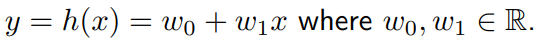

Persamaan di atas adalah fungsi yang memetakan **X** ke **Y** (anggap Y = h(x)), dengan:
- w0 adalah intersep
- w1 adalah koefisien
- x adalah nilai independen
- y adalah nilai dependen

Tentunya, persamaan ini bisa digeneralisasikan untuk banyak nilai x (fitur lebih dari 1) untuk menentukan nilai y. Berikut adalah persamaannya.

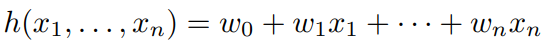

atau

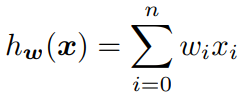

Nilai-nilai parameter seperti w0, w1, w2, wn, dst. inilah yang dicari untuk mendapatkan persamaan/fungsi yang cocok dengan data pada linear regression.

Pencarian didasarkan pada peminimalan error/residual dengan meminimal kan fungsi loss linear regression. J(w) di bawah ini adalah contoh fungsi loss linear regression.

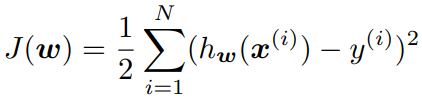

Proses peminimalan fungsi loss disebut dengan gradient descent yang bisa Anda pelajari lebih lanjut dari slide kuliah. :)

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Linear Regression dengan Scikit-learn**

Scikit-learn memiliki modul LinearRegression untuk membuat model linear regression. Di bawah ini adalah contoh implementasinya.

Pada percobaan kali ini, kita akan menggunakan data buatan yang terdiri dari 3 variabel dan 1 target. Hubungan antara variabel dan target dipenuhi oleh fungsi `y = 1+2x1+x2-x3`. Nilai-nilai 1, 2, 1, dan -1, secara berurutan dapat dianggap sebagai nilai w0, w1, w2, dan w3.

In [ ]:
import numpy as np

# Membuat data buatan dengan beberapa noises yang disengaja

x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
x2  = np.array([3, 4, 2, 3, 5, 6, 2, 1, 1, 4])
x3  = np.array([2, 1, 3, 2, 4, 3, 1, 3, 5, 6])

X_train = np.stack((x1, x2, x3), axis=1)
y_train   = np.array([6, 10, 4, 11, 12, 9, 4, 7, 7, 1])

print('X: ', X_train)
print('y: ', y_train)

X:  [[2 3 2]
 [3 4 1]
 [2 2 3]
 [4 3 2]
 [5 5 4]
 [2 6 3]
 [1 2 1]
 [5 1 3]
 [5 1 5]
 [1 4 6]]
y:  [ 6 10  4 11 12  9  4  7  7  1]


In [ ]:
# Melatih model linear regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

Pada tahap ini, trained model 'linear' telah mengandung informasi (parameter-parameter) yang memenuhi suatu persamaan linear. Hal tersebut dapat kita lihat dengan cara di bawah ini.

In [ ]:
# Melihat nilai koefisien dan intersep persamaan linear regression pada trained model

print("Koefisien persamaan linear: \n", linear.coef_)
print("Intersep persamaan linear: \n", linear.intercept_)

Koefisien persamaan linear: 
 [ 1.90430504  1.2595326  -1.03653137]
Intersep persamaan linear: 
 0.5921279212792125


Dapat dilihat bahwa nilai-nilai di atas hampir mirip dengan nilai-nilai intersep dan koefisien fungsi yang didefinisikan sebelumnya.

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [ ]:
# Melakukan percobaan prediksi model linear regression menggunakan data testing buatan

X_test = np.array([[2, 3, 1], [1, 3, 4]])
y_test = np.array([7, 2])

y_predict = linear.predict(X_test)

print(y_predict)

[7.14280443 2.12890529]


Hasil prediksi (y_predict) memiliki nilai yang hampir mirip dengan nilai y yang sebenarnya (y_test). Hal ini menandakan model memiliki performa yang baik. 

Performa model regresi dapat diukur dengan beberapa metrik evaluasi, contohnya adalah R-squared. Lihat kode di bawah ini.

In [ ]:
from sklearn import metrics

# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

R-squared: 0.9970392257428109


Dari hasil di atas, dapat diketahui bahwa perbedaan antara prediksi dan aktual memiliki nilai yang kecil.

### Ridge and Lasso Regression

Linear regression adalah model yang memiliki ciri high-bias dan low-variance. Biasanya, model seperti ini cenderung tidak overfit. Walau demikian, linear regression masih dapat mengalami overfitting, apalagi pada data yang memiliki banyak fitur (high-dimension). 

Untuk mengatasi hal tersebut, diperlukan regularisasi. Pada linear regression, regularisasi adalah teknik untuk meminimalkan fungsi loss dengan penambahan regularization term pada fungsi loss. Dua teknik regularisasi pada linear regression adalah Ridge dan Lasso. Berikut adalah modifikasi fungsi loss linear regression pada ridge dan lasso regression.

- Ridge regression

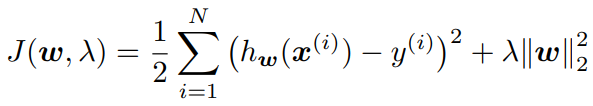

- Lasso Regression

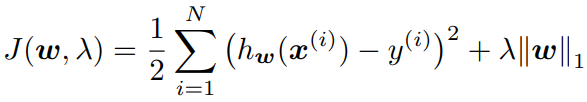

Term tambahan pada fungsi loss tersebut berperan seperti bobot pinalti untuk meminimalkan overfitting. Pada regularization term terdapat parameter λ yang pada sumber lain disebut sebagai α (alpha).

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Ridge dan Lasso Regression dengan Scikit-learn**

Berikut adalah contoh implementasi ridge dan lasso regression menggunakan modul scikit-learn pada dataset housing.

In [ ]:
# Melatih model ridge regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=5) # Mengatur hyperparameter alpha=5
ridge.fit(X_train, y_train)

Ridge(alpha=5)

Setelah pelatihan selesai, **ridge** sudah memiliki parameter-parameter yang dianggap cocok dalam persamaan linear regression dengan generalisasi ridge regression.

In [ ]:
# Melatih model lasso regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=5) # Mengatur hyperparameter alpha=5
lasso.fit(X_train, y_train)

Lasso(alpha=5)

Setelah pelatihan selesai, **ridge** sudah memiliki parameter-parameter yang dianggap cocok dalam persamaan linear regression dengan generalisasi ridge regression.

**NOTE**: Parameter alpha adalah parameter yang merepresentasikan “kekuatan” dari regularisasi yang dilakukan oleh model. Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi *generalization error*, dengan kata lain menghindari *overfitting*. Hal ini dilakukan dengan memberikan batasan/*constraint* atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

Anda dipersilakan untuk mencoba sendiri memprediksi dan mengukur performa model ridge dan lasso regression. Performa mungkin tidak akan jauh berbeda dengan linear regression karena hanya mengunakan data yang sangat kecil.

### Logistic Regression

Logistic regression adalah model linear yang hanya memiliki dua nilai output: 0 atau 1. Oleh karena itu logistic regression lebih cocok dianggap sebagai classifier daripada regressor. Contoh visualisasinya adalah sebagai berikut.

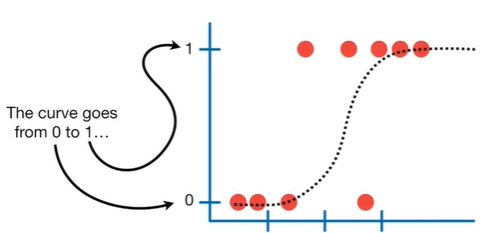

Sumber: https://youtu.be/yIYKR4sgzI8?t=222

Untuk mendapatkan kurva seperti pada gambar, berikut adalah persamaan logistic regression yang memenuhi.

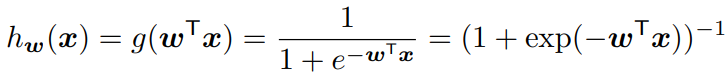

Berbeda dengan model linear, ridge, dan lasso regression yang meminimalkan fungsi loss. Pada logistic regression dilakukan proses memaksimalkan fungsi likelihood untuk menemukan parameter yang cocok dengan data.

Hal ini karena logistic regression merupakan metode klasifikasi. Sehingga, alih-alih meminimalkan perbedaan hasil prediksi, di sini memaksimalkan persamaan hasil prediksi dengan aktual. 

Fungsi/persamaan likelihood dimaksimalkan melalui proses yang disebut dengan gradient ascent (tentunya bisa dipelajari sendiri dari slide :D). Berikut adalah persamaan likelihood tersebut.

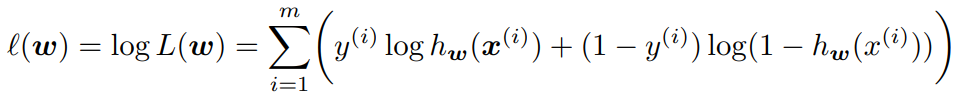

**Sumber gambar (persamaan) dan penjelasan lebih detail:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Logistic regression** dengan Scikit-learn

Pada bagian ini kita melatih model logistic regression menggunakan modul dari scikit-learn. Data yang digunakan sama seperti pada bagian sebelumnya, hanya saja terdapat perubahan pada data target. Kali ini target hanya berisi nilai 0 atau 1. Nilai target (y_logistic_train) diolah dari y_train, dengan kondisi: bernilai 0 jika y_train >= 7 dan bernilai 1 jika sebaliknya.


In [ ]:
x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
x2  = np.array([3, 4, 2, 3, 5, 6, 2, 1, 1, 4])
x3  = np.array([2, 1, 3, 2, 4, 3, 1, 3, 5, 6])

X_train = np.stack((x1, x2, x3), axis=1)
y_logistic_train   = np.array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0])

print('X: ', X_train)
print('y: ', y_train)

X:  [[2 3 2]
 [3 4 1]
 [2 2 3]
 [4 3 2]
 [5 5 4]
 [2 6 3]
 [1 2 1]
 [5 1 3]
 [5 1 5]
 [1 4 6]]
y:  [ 6 10  4 11 12  9  4  7  7  1]


In [ ]:
# Melatih model logistic regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_logistic_train)

LogisticRegression()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [ ]:
# Melakukan percobaan prediksi model logistic regression menggunakan data testing buatan

X_test = np.array([[2, 3, 1], [1, 3, 4]])
y_test = np.array([1, 0])

y_logistic_predict = logistic.predict(X_test)

print(y_logistic_predict)

[0 0]


Untuk mengevaluasi performa logistic regression, tentunya berbeda dengan linear, ridge, maupun lasso regression. Hasil prediksi model logistic regression dievaluasi selayaknya model klasifikasi. Contohnya dengan akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 0.5.

In [ ]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", logistic.score(X_test, y_test))

Nilai rata-rata akurasi: 0.5


### Softmax Regression

Softmax regression adalah model yang merupakan modifikasi dari logistic regression. Pada model ini, output dapat memiliki nilai lebih dari dua buah. Sehingga, softmax regression disebut sebagai multiclass classification.

Persamaan softmaxe regression:

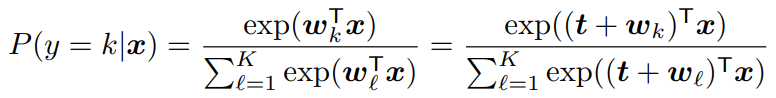

Persamaan likelihood softmaxe regression:

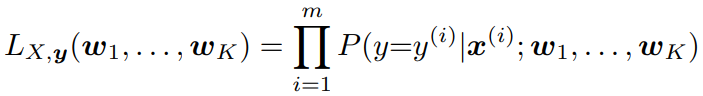

Proses memaksimalkan persamaan likelihood juga sama seperti pada logistic regression, yaitu dengan gradient ascent.

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Softmax regression dengan Scikit-learn**

Pada bagian ini kita melatih model softmax regression menggunakan modul dari scikit-learn. Softmax regression pada scikit-learn terdapat pada modul logistic regression dengan pengaturan hyperparameter 'multi_class' menjadi 'multinominal'.

Data yang digunakan sama seperti pada bagian sebelumnya, hanya saja terdapat perubahan pada data target. Kali ini target hanya berisi nilai 0, 1, 2. Nilai target (y_softmax_train) diolah dari y_train, dengan kondisi: bernilai 0 jika y_train < 6, bernilai 1 jika 6 <= y_train < 9, dan bernilai 2 jika y_train >=.


In [ ]:
x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
x2  = np.array([3, 4, 2, 3, 5, 6, 2, 1, 1, 4])
x3  = np.array([2, 1, 3, 2, 4, 3, 1, 3, 5, 6])

X_train = np.stack((x1, x2, x3), axis=1)
y_softmax_train   = np.array([1, 2, 0, 2, 2, 2, 0, 1, 1, 0])

print('X: ', X_train)
print('y: ', y_softmax_train)

X:  [[2 3 2]
 [3 4 1]
 [2 2 3]
 [4 3 2]
 [5 5 4]
 [2 6 3]
 [1 2 1]
 [5 1 3]
 [5 1 5]
 [1 4 6]]
y:  [1 2 0 2 2 2 0 1 1 0]


In [ ]:
# Melatih model softmax regression menggunakan Scikit-learn pada training set

softmax = LogisticRegression(multi_class='multinomial')
softmax.fit(X_train, y_softmax_train)

LogisticRegression(multi_class='multinomial')

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [ ]:
# Melakukan percobaan prediksi model softmax regression menggunakan data testing buatan

X_test = np.array([[2, 3, 1], [1, 3, 4]])
y_softmax_test = np.array([1, 0])

y_logistic_predict = softmax.predict(X_test)

print(y_logistic_predict)

[2 0]


Performa model softmax regression dievaluasi sama dengan logistic regression, selayaknya classifier. Contohnya adalah akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 0.5.

In [ ]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", softmax.score(X_test, y_test))

Nilai rata-rata akurasi: 0.5


## Latihan Soal

Pada bagian ini, Anda akan membuat prediksi regresi dan klasifikasi menggunakan beberapa model linear yang telah dipelajari di atas. Data yang digunakan lebih besar dibandingkan data buatan sebelumnya.

### Penjelasan Dataset

Dataset yang digunakan pada bagian ini adalah data perumahan di California, USA. Data didapatkan dari Kaggle dengan beberapa perubahan. Berikut penjelasan masing-masing kolom pada data.

- **Longitude:** Ukuran seberapa jauh ke barat sebuah rumah; nilai yang lebih tinggi lebih jauh ke barat

- **Latitude:** Ukuran seberapa jauh ke utara sebuah rumah; nilai yang lebih tinggi lebih jauh ke utara

- **TotalRooms:** Jumlah total kamar dalam satu blok

- **TotalBedrooms:** Jumlah total kamar tidur dalam satu blok

- **Population:** Jumlah total orang yang tinggal dalam satu blok

- **Households:** Jumlah total rumah tangga, sekelompok orang yang tinggal dalam satu unit rumah, untuk satu blok

- **HousingMedianAge:** Usia median sebuah rumah dalam satu blok; angka yang lebih rendah adalah bangunan yang lebih baru

- **MedianIncome:** Pendapatan median untuk rumah tangga dalam satu blok rumah (diukur dalam puluhan ribu Dolar AS)

- **TargetMedianHouseValue:** Nilai rumah rata-rata untuk rumah tangga dalam satu blok (diukur dalam Dolar AS)

- **TargetLogistic:** Pengelompokan nilai rumah rata-rata yang dibagi menjadi dua. Pembagi berdasarkan nilai mediannya (=17845). Bernilai 1 jika targetMedianHouseValue > 178450 dan 0 sebaliknya

- **TargetSoftmax:** Pengelompokan nilai rumah rata-rata yang dibagi menjadi tiga. Pembagi berdasarkan nilai persentil ke-33.33 (=142700) dan persentil ke-66.67 (=234900). Bernilai 2 jika targetMedianHouseValue >= 234900, 1 jika 142700 <= targetMedianHouseValue < 234900, dan 0 jika targetMedianHouseValue < 142700

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/camnugent/california-housing-prices

### Preprocessing

In [ ]:
import pandas as pd

# Import dataset california housing
df = pd.read_csv('ca_housing.csv')

df.head()

Longitude  Latitude  TotalRooms  TotalBedrooms  Population  Households  \
0    -122.69     38.34        2846          516.0        1526         492   
1    -117.28     32.83        2392          653.0         933         619   
2    -122.04     37.31        2476          434.0        1217         416   
3    -117.07     32.91        2234          256.0         894         253   
4    -117.92     33.83         382           86.0         272          81   

   HousingMedianAge  MedianIncome OceanProximity  TargetMedianHouseValue  \
0                23        3.7330      <1H OCEAN                  163500   
1                34        3.7306     NEAR OCEAN                  500000   
2                29        6.2045      <1H OCEAN                  393800   
3                 5       10.3354      <1H OCEAN                  477600   
4                17        1.4250      <1H OCEAN                  212500   

   TargetLogistic  TargetSoftmax  
0               0              1  
1               1              2  
2               1              2  
3               1              2  
4               1              1

In [ ]:
# Menampilkan ringkasan data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Longitude               1000 non-null   float64
 1   Latitude                1000 non-null   float64
 2   TotalRooms              1000 non-null   int64  
 3   TotalBedrooms           988 non-null    float64
 4   Population              1000 non-null   int64  
 5   Households              1000 non-null   int64  
 6   HousingMedianAge        1000 non-null   int64  
 7   MedianIncome            1000 non-null   float64
 8   OceanProximity          1000 non-null   object 
 9   TargetMedianHouseValue  1000 non-null   int64  
 10  TargetLogistic          1000 non-null   int64  
 11  TargetSoftmax           1000 non-null   int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 93.9+ KB


In [ ]:
# Melihat deskripsi statistik dari kelompok fitur numerik
df.describe()

Longitude     Latitude    TotalRooms  TotalBedrooms    Population  \
count  1000.000000  1000.000000   1000.000000     988.000000   1000.000000   
mean   -119.571240    35.621040   2598.210000     527.345142   1403.143000   
std       2.022209     2.159259   2117.999988     395.919615   1064.360733   
min    -124.230000    32.560000     26.000000       9.000000     26.000000   
25%    -121.790000    33.930000   1437.500000     299.000000    792.750000   
50%    -118.470000    34.235000   2101.500000     418.000000   1151.500000   
75%    -118.007500    37.720000   3102.250000     623.250000   1688.000000   
max    -115.510000    41.860000  30401.000000    4957.000000  13251.000000   

        Households  HousingMedianAge  MedianIncome  TargetMedianHouseValue  \
count  1000.000000       1000.000000   1000.000000             1000.000000   
mean    494.167000         29.350000      3.844988           209471.146000   
std     361.361508         12.841199      1.887100           117527.151777   
min      10.000000          2.000000      0.706900            14999.000000   
25%     284.000000         19.000000      2.475475           122175.000000   
50%     398.000000         30.000000      3.534100           178450.000000   
75%     595.750000         38.000000      4.792300           268350.000000   
max    4339.000000         52.000000     15.000100           500001.000000   

       TargetLogistic  TargetSoftmax  
count      1000.00000    1000.000000  
mean          0.50000       1.001000  
std           0.50025       0.817109  
min           0.00000       0.000000  
25%           0.00000       0.000000  
50%           0.50000       1.000000  
75%           1.00000       2.000000  
max           1.00000       2.000000

In [ ]:
# Melihat deskripsi statistik dari kelompok fitur kategorikal
display(df.describe(include=object))

OceanProximity
count            1000
unique              4
top         <1H OCEAN
freq              465

**Penanganan Missing Values**

In [ ]:
# Melihat jumlah missing values

def cek_missing_values(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]
    
cek_missing_values(df)

Total  Percent
TotalBedrooms     12    0.012

Terdapat missing values pada kolom TotalBedrooms, sebesar 1.2%. Untuk mengatasi ini, nilai null diganti dengan nilai median.

In [ ]:
# Menangani missing values dengan median
df.TotalBedrooms.fillna(df.TotalBedrooms.median(), inplace=True)

cek_missing_values(df)

Empty DataFrame
Columns: [Total, Percent]
Index: []

**Penanganan Duplikasi Data**

In [ ]:
# Melihat jumlah duplikasi data
print('Jumlah duplikasi pada data adalah', df.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 0


**Penanganan Outliers**

In [ ]:
# Melihat jumlah kemungkinan adanya outliers pada data menggunakan IQR

# Menghitung quartil 1 dan 3.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Menghitung RUB dan RLB.
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

# Menampilkan banyaknya outlier pada atribut.
outliers = (df < lower_limit) | (df > upper_limit)
print ("Outlier pada tiap atribut:")
print(outliers.sum())

Outlier pada tiap atribut:
Households                62
HousingMedianAge           0
Latitude                   0
Longitude                  0
MedianIncome              28
OceanProximity             0
Population                63
TargetLogistic             0
TargetMedianHouseValue    54
TargetSoftmax              0
TotalBedrooms             69
TotalRooms                64
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  del sys.path[0]


Berdasarkan hasil di atas, terdapat beberapa outliers. Kali ini, outliers tersebut ditangani dengan menghapusnya.

In [ ]:
# Menghapus outliers
df_cleaned = df[~((df <= lower_limit) | (df >= upper_limit)).any(axis=1)].reset_index(drop=True)

print(df_cleaned.shape)

(848, 12)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


**NOTE:** Warning di atas terjadi karena terdapat kolom yang berjenis kategorikal, yaitu OceanProximity. Tidak perlu khawatir dengan warning tersebut.

**Encoding Data Kategorikal**

Karena terdapat kolom yang berjenis kategorikal, maka perlu dilakukan encoding agar menjadi data numerik. Metode encoding yang dilakukan adalah one-hot encoding.

In [ ]:
# Melakukan one-hot encoding data kategorikal

df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)
df_cleaned.head()

Longitude  Latitude  TotalRooms  TotalBedrooms  Population  Households  \
0    -122.69     38.34        2846          516.0        1526         492   
1    -122.04     37.31        2476          434.0        1217         416   
2    -117.92     33.83         382           86.0         272          81   
3    -122.26     37.77        1670          350.0         793         299   
4    -122.30     38.33        4741          956.0        2043         856   

   HousingMedianAge  MedianIncome  TargetMedianHouseValue  TargetLogistic  \
0                23        3.7330                  163500               0   
1                29        6.2045                  393800               1   
2                17        1.4250                  212500               1   
3                52        2.9732                  282100               1   
4                15        4.1862                  183600               1   

   TargetSoftmax  OceanProximity_INLAND  OceanProximity_NEAR BAY  \
0              1                      0                        0   
1              2                      0                        0   
2              1                      0                        0   
3              2                      0                        1   
4              1                      0                        1   

   OceanProximity_NEAR OCEAN  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

**Memisahkan Kolom-Kolom Target dan Fitur**

In [ ]:
# Memisahkan kolom-kolom target untuk regression, logistic regression, dan softmax regression dari kolom-kolom fitur

X = df_cleaned.drop('TargetMedianHouseValue', axis=1)
X = X.drop('TargetLogistic', axis=1)
X = X.drop('TargetSoftmax', axis=1)

y = df_cleaned['TargetMedianHouseValue']
y_logistic = df_cleaned['TargetLogistic']
y_softmax = df_cleaned['TargetSoftmax']

Pada tahap ini, kita sudah memiliki:
- **X:** kolom-kolom fitur
- **y:** kolom target untuk linear, ridge, dan lasso regression
- **y_logistic:** kolom target logistic regression
- **y_softmax:** kolom target softmax regression

Dataset sudah siap digunakan. Saat ini, Anda diminta untuk mengerjakan latihan soal di bawah ini.

### Soal 1: Linear Regression

Ikuti langkah-langkah di bawah ini.

a. Bagi dataset menjadi training untuk melatih model dan testing untuk melakukan prediksi. Gunakan train_test_split dari Scikit-learn.

In [ ]:
# Memisahkan kolom-kolom target untuk regression, logistic regression, dan softmax regression dari kolom-kolom fitur

X = df_cleaned.drop('TargetMedianHouseValue', axis=1)
X = X.drop('TargetLogistic', axis=1)
X = X.drop('TargetSoftmax', axis=1)

y = df_cleaned['TargetMedianHouseValue']

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, silhouette_score, mean_squared_error ,mean_absolute_error, r2_score, make_scorer, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

b. Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set.

In [ ]:
from sklearn.preprocessing import StandardScaler

train_feature = X_train

scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_feature)
#normalization fitur pada dataset training
X_train = pd.DataFrame(scaled_data, columns=train_feature.columns)

test_feature = X_test

scaler = StandardScaler()
scaled_data = scaler.fit_transform(test_feature)
#normalization fitur pada dataset training
X_test = pd.DataFrame(scaled_data, columns=test_feature.columns)

In [ ]:
# Melatih model linear regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

c. Lakukan prediksi TargetMedianHouseValue menggunakan Linear Regression

In [ ]:
linear_test = LinearRegression()
linear_test.fit(X_test, y_test)
y_predict = linear_test.predict(X_test)

print(y_predict)

[228879.98613723 231381.20457024 212067.1609702   49803.24692445
 309488.47099771 161524.5870067  304355.04491819 230610.8736142
 145766.04409318 171391.01335924 212153.81145667  98904.79829287
 123671.73137355 196595.3321165  166388.05441746 280911.85409162
  76218.3231654  230480.92220001 240508.15928368 238315.19956122
 105378.59518166 133001.13692354 170676.90484897 325181.9361348
 153957.00036367 100476.0165959  192742.40520919 259317.74082394
 266317.14870059 306707.54323363 313314.06398776 203242.10861194
 218576.95295641 124886.96864392 323685.70292216 198591.96436824
 242819.81017196  76010.91551404 238998.21151732 130741.85438509
 285967.69639329 223791.27400795 213432.58133804 281634.08135561
 155985.77137279 262120.53609949 118101.34250877 231412.11407213
 138912.93842486  37634.93928742 215920.06346943 209362.69362754
 190467.84433995 114384.02194911 321316.49570584 167904.14308921
 243375.5662318  101719.15244879 158429.37127989 283179.94746079
  37437.82990094 109304.639

d. Tampilkan visualisasi perbandingan hasil prediksi dengan aktual

In [ ]:
import matplotlib.pyplot as plt

def plotGraph(y_test,y_pred):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(y_test, y_pred, color='red')
    plt.plot(range(my_range), range(my_range), 'o')
    plt.title("Perbandingan Data Prediksi dengan Data Aktual")
    plt.show()
    return

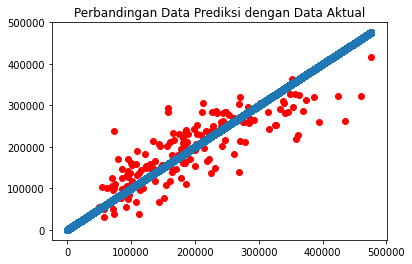

In [ ]:
plotGraph(y_test,y_predict)

e. Persamaan linear apa yang terbentuk pada model linear regression yang dilatih?

f. Tampilkan metrik evaluasi regresi yang mencakup MSE, MAE, RMSE, dan R2 Squared!

In [ ]:
from sklearn import metrics

# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

R-squared: 0.6915968486429229


In [ ]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def metrics(prediction):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [ ]:
metrics(y_predict)

MAE: 40207.4114182108
MSE: 2746747564.2945614
RMSE: 52409.4224762548
R_squared: 0.6915968486429229


### Soal 2: Ridge Regression

Ikuti langkah-langkah di bawah ini. Gunakan training dan testing set yang sama dengan Linear Regression.

a. Tentukan minimal 5 buah nilai parameter alpha untuk digunakan dalam membangun model Ridge Regression

In [ ]:
# Melatih model ridge regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Ridge

ridge_regression_5 = Ridge(alpha=5)
ridge_regression_6 = Ridge(alpha=6)
ridge_regression_7 = Ridge(alpha=7)
ridge_regression_8 = Ridge(alpha=8)
ridge_regression_9 = Ridge(alpha=9)

b. Bangun (fit) model sebanyak nilai parameter alpha yang dipilih 

In [ ]:
ridge_regression_5.fit(X_train, y_train)
y_predict_ridge_5_train = ridge_regression_5.predict(X_train)

ridge_regression_6.fit(X_train, y_train)
y_predict_ridge_6_train = ridge_regression_6.predict(X_train)

ridge_regression_7.fit(X_train, y_train)
y_predict_ridge_7_train = ridge_regression_7.predict(X_train)

ridge_regression_8.fit(X_train, y_train)
y_predict_ridge_8_train = ridge_regression_8.predict(X_train)

ridge_regression_9.fit(X_train, y_train)
y_predict_ridge_9_train = ridge_regression_9.predict(X_train)

In [ ]:
ridge_regression_5.fit(X_test, y_test)
y_predict_ridge_5 = ridge_regression_5.predict(X_test)

ridge_regression_6.fit(X_test, y_test)
y_predict_ridge_6 = ridge_regression_6.predict(X_test)

ridge_regression_7.fit(X_test, y_test)
y_predict_ridge_7 = ridge_regression_7.predict(X_test)

ridge_regression_8.fit(X_test, y_test)
y_predict_ridge_8 = ridge_regression_8.predict(X_test)

ridge_regression_9.fit(X_test, y_test)
y_predict_ridge_9 = ridge_regression_9.predict(X_test)

c. Tampilkan nilai R-squared untuk masing-masing model pada training dan testing set

In [ ]:
R_squared_train5 = r2_score(y_train, y_predict_ridge_5_train)
print(R_squared_train5)
R_squared_train6 = r2_score(y_train, y_predict_ridge_6_train)
print(R_squared_train6)
R_squared_train7 = r2_score(y_train, y_predict_ridge_7_train)
print(R_squared_train7)
R_squared_train8 = r2_score(y_train, y_predict_ridge_8_train)
print(R_squared_train8)
R_squared_train9 = r2_score(y_train, y_predict_ridge_9_train)
print(R_squared_train9)

0.6252167106246365
0.6249372616832698
0.6246383153993745
0.6243243994025746
0.6239990295801756


In [ ]:
R_squared_test5 = r2_score(y_test, y_predict_ridge_5)
print(R_squared_test5)
R_squared_test6 = r2_score(y_test, y_predict_ridge_6)
print(R_squared_test6)
R_squared_test7 = r2_score(y_test, y_predict_ridge_7)
print(R_squared_test7)
R_squared_test8 = r2_score(y_test, y_predict_ridge_8)
print(R_squared_test8)
R_squared_test9 = r2_score(y_test, y_predict_ridge_9)
print(R_squared_test9)

0.6831334336049244
0.6813582406879636
0.6796685126025201
0.6780561549624271
0.6765119232484119


d. Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

Semakin tinggi kita menentukan nilai parameter alphanya, maka akan mengurangi depedensi pada variable tersebut yang artinya dengan kata lain indepedensi variabel tersebut meningkat

### Soal 3: Lasso Regression

Ikuti langkah-langkah di bawah ini. Gunakan training dan testing set yang sama dengan Linear Regression.

a. Tentukan minimal 5 buah nilai parameter alpha untuk digunakan dalam membangun model Lasso Regression

In [ ]:
# Melatih model lasso regression menggunakan Scikit-learn pada training set
from sklearn.linear_model import Lasso

Lasso_regression_5 = Lasso(alpha=5)
Lasso_regression_6 = Lasso(alpha=6)
Lasso_regression_7 = Lasso(alpha=7)
Lasso_regression_8 = Lasso(alpha=8)
Lasso_regression_9 = Lasso(alpha=9)

b. Bangun (fit) model sebanyak nilai parameter alpha yang dipilih

In [ ]:
Lasso_regression_5.fit(X_train, y_train)
y_predict_Lasso_5_train = Lasso_regression_5.predict(X_train)

Lasso_regression_6.fit(X_train, y_train)
y_predict_Lasso_6_train = Lasso_regression_6.predict(X_train)

Lasso_regression_7.fit(X_train, y_train)
y_predict_Lasso_7_train = Lasso_regression_7.predict(X_train)

Lasso_regression_8.fit(X_train, y_train)
y_predict_Lasso_8_train = Lasso_regression_8.predict(X_train)

Lasso_regression_9.fit(X_train, y_train)
y_predict_Lasso_9_train = Lasso_regression_9.predict(X_train)

In [ ]:
Lasso_regression_5.fit(X_test, y_test)
y_predict_Lasso_5 = Lasso_regression_5.predict(X_test)

Lasso_regression_6.fit(X_test, y_test)
y_predict_Lasso_6 = Lasso_regression_6.predict(X_test)

Lasso_regression_7.fit(X_test, y_test)
y_predict_Lasso_7 = Lasso_regression_7.predict(X_test)

Lasso_regression_8.fit(X_test, y_test)
y_predict_Lasso_8 = Lasso_regression_8.predict(X_test)

Lasso_regression_9.fit(X_test, y_test)
y_predict_Lasso_9 = Lasso_regression_9.predict(X_test)

c. Tampilkan nilai R-squared untuk masing-masing model pada training dan testing set

In [ ]:
R_squared_train5 = r2_score(y_train, y_predict_Lasso_5_train)
print(R_squared_train5)
R_squared_train6 = r2_score(y_train, y_predict_Lasso_6_train)
print(R_squared_train6)
R_squared_train7 = r2_score(y_train, y_predict_Lasso_7_train)
print(R_squared_train7)
R_squared_train8 = r2_score(y_train, y_predict_Lasso_8_train)
print(R_squared_train8)
R_squared_train9 = r2_score(y_train, y_predict_Lasso_9_train)
print(R_squared_train9)

0.6260355607034165
0.6260354280261926
0.6260352710720419
0.626035089729529
0.6260348846479361


In [ ]:
R_squared_test5 = r2_score(y_test, y_predict_Lasso_5)
print(R_squared_test5)
R_squared_test6 = r2_score(y_test, y_predict_Lasso_6)
print(R_squared_test6)
R_squared_test7 = r2_score(y_test, y_predict_Lasso_7)
print(R_squared_test7)
R_squared_test8 = r2_score(y_test, y_predict_Lasso_8)
print(R_squared_test8)
R_squared_test9 = r2_score(y_test, y_predict_Lasso_9)
print(R_squared_test9)

0.6915964999858759
0.6915963469039637
0.6915961654021057
0.6915959567920531
0.6915957195444574


d. Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

Dari hasil percobaan Lasso Regression di atas, Semakin tinggi kita menentukan nilai parameter alphanya, maka akan mengurangi depedensi pada variable tersebut yang artinya dengan kata lain indepedensi variabel tersebut meningkat. Walaupun jika dibandingkan denga Ridge Regression, efek yang terjadi pada perubahana nilai parameter alpha di Lasso Regression tidak terlalu signifikan

### Soal 4: Logistic Regression

Ikuti langkah-langkah di bawah ini.

a. Bagi dataset menjadi training untuk melatih model dan testing untuk melakukan prediksi. Gunakan train_test_split dari Scikit-learn.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, silhouette_score, mean_squared_error ,mean_absolute_error, r2_score, make_scorer, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y_logistic,test_size=0.2,random_state=123)

b. Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [ ]:
from sklearn.preprocessing import StandardScaler

train_feature = X_train

scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_feature)
#normalization fitur pada dataset training
X_train = pd.DataFrame(scaled_data, columns=train_feature.columns)

test_feature = X_test

scaler = StandardScaler()
scaled_data = scaler.fit_transform(test_feature)
#normalization fitur pada dataset training
X_test = pd.DataFrame(scaled_data, columns=test_feature.columns)

In [ ]:
# Melatih model logistic regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

c. Lakukan prediksi TargetLogistic menggunakan Logistic Regression

In [ ]:
logistic_test = LogisticRegression()
logistic_test.fit(X_test, y_test)
y_predict = logistic_test.predict(X_test)

print(y_predict)

[1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1
 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0
 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1]


d. Tampilkan confussion matrix hasil prediksi

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, silhouette_score, mean_squared_error ,mean_absolute_error, r2_score, make_scorer, roc_auc_score, ConfusionMatrixDisplay

def confussion_matrix(classifier, prediction, y_test = y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi:\n\n%s\n" % (classification_report(y_test, classifier.predict(X_test))))

    # Confusion Matrix
    print("\n\nConfusion Matrix\n")
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        85
           1       1.00      0.95      0.98        85

    accuracy                           0.98       170
   macro avg       0.98      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170




Confusion Matrix



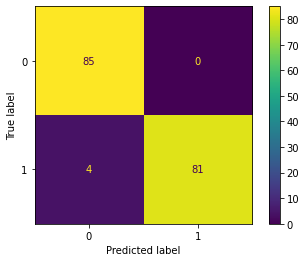

In [ ]:
confussion_matrix(logistic_test, y_predict)

e. Tampilkan hasil evaluasi model klasifikasi

In [ ]:
def evaluate_model(classifier, prediction, y_test = y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi:\n\n%s\n" % (classification_report(y_test, classifier.predict(X_test))))

    # Butuh informasi lebih lengkap? silakan disimak di bawah ini
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro'))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro'))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro'))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro'))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))

In [ ]:
evaluate_model(logistic_test, y_predict)

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        85
           1       1.00      0.95      0.98        85

    accuracy                           0.98       170
   macro avg       0.98      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170


Accuracy: 0.9764705882352941
Precision Macro Average: 0.9775280898876404
Precision Micro Average: 0.9764705882352941
Recall Macro Average: 0.9764705882352941
Recall Micro Average: 0.9764705882352941
F1 Macro Average: 0.9764575543553524
F1 Micro Average: 0.9764705882352941


f. Berikan analisis terhadap hasil evaluasi

Dari hasil analisis di atas, dapat dikatakan bahwa logistic regression memiliki nilai akurasi prediksi yang sangat baik

### Soal 5: Softmax Regression

Ikuti langkah-langkah di bawah ini.

a. Bagi dataset menjadi training untuk melatih model dan testing untuk melakukan prediksi. Gunakan train_test_split dari Scikit-learn.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, silhouette_score, mean_squared_error ,mean_absolute_error, r2_score, make_scorer, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y_softmax,test_size=0.2,random_state=123)

b. Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set.

In [ ]:
from sklearn.preprocessing import StandardScaler

train_feature = X_train

scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_feature)
#normalization fitur pada dataset training
X_train = pd.DataFrame(scaled_data, columns=train_feature.columns)

test_feature = X_test

scaler = StandardScaler()
scaled_data = scaler.fit_transform(test_feature)
#normalization fitur pada dataset training
X_test = pd.DataFrame(scaled_data, columns=test_feature.columns)

In [ ]:
# Melatih model softmax regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LogisticRegression

softmax = LogisticRegression(multi_class='multinomial')
softmax.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

c. Lakukan prediksi TargetSoftmax menggunakan Softmax Regression

In [ ]:
softmax_test = LogisticRegression(multi_class='multinomial')
softmax_test.fit(X_test, y_test)
y_predict = softmax_test.predict(X_test)

print(y_predict)

[2 1 1 0 2 0 2 1 0 0 2 0 0 1 1 2 0 1 1 1 0 0 1 2 1 0 1 2 2 2 2 2 2 0 2 1 1
 1 0 0 2 1 0 2 1 2 1 1 1 0 1 1 0 0 2 1 2 0 0 2 0 1 1 1 0 1 1 2 1 1 0 0 0 2
 1 1 1 2 2 1 2 2 0 2 1 0 2 0 2 2 0 0 1 0 1 0 1 1 1 2 0 1 2 0 0 0 1 0 1 1 0
 0 0 1 0 2 2 0 2 1 0 2 0 0 1 1 1 2 2 1 2 1 0 2 1 0 2 1 1 2 0 2 2 0 0 2 0 0
 1 1 2 2 1 1 0 1 1 2 1 2 0 0 1 0 0 0 0 1 0 2]


d. Tampilkan confussion matrix hasil prediksi

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       1.00      0.69      0.82        85
           1       0.58      0.42      0.49        85
           2       0.00      0.00      0.00         0

    accuracy                           0.56       170
   macro avg       0.53      0.37      0.44       170
weighted avg       0.79      0.56      0.65       170




Confusion Matrix



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


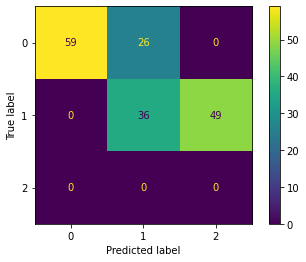

In [ ]:
confussion_matrix(softmax_test, y_predict)

e. Tampilkan hasil evaluasi model klasifikasi

In [ ]:
evaluate_model(softmax_test, y_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hasil Evaluasi:

              precision    recall  f1-score   support

           0       1.00      0.69      0.82        85
           1       0.58      0.42      0.49        85
           2       0.00      0.00      0.00         0

    accuracy                           0.56       170
   macro avg       0.53      0.37      0.44       170
weighted avg       0.79      0.56      0.65       170


Accuracy: 0.5588235294117647
Precision Macro Average: 0.5268817204301075
Precision Micro Average: 0.5588235294117647
Recall Macro Average: 0.37254901960784315
Recall Micro Average: 0.5588235294117647
F1 Macro Average: 0.43641345427059713
F1 Micro Average: 0.5588235294117647


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


f. Berikan analisis terhadap hasil evaluasi

Dari hasil analisis di atas, didaptkan bahwa nilai akurasinya tidak terlalu bagus, yaitu hanya sampai kurang lebih 56%

### Soal 6: Pertanyaan Teoritis

Jawablah pertanyaan-pertanyaan di bawah ini.

a. Pada bagian preprocessing data dilakukan one-hot encoding untuk kolom kategorikal. Perhatikan bahwa terdapat pengaturan parameter **drop_first=True**. Apa yang dilakukan oleh pengaturan tersebut? Apa manfaatnya bagi pemodelan linear regression?

Tujuan dari adanya drop_first=True adalah untuk mengurangi kolom ekstra yang dibuat ketika melakukan dummy variable. Hal tersebut cukup penting dilakukan dalam pemodelan linear regression karena dalam pemodelan linear regression, kita melakukan prediksi nilai dari suatu variabel berdasarkan nilai pada variabel lainnya

b. Bandingkan perbedaan hasil linear, ridge, dan lasso regression yang telah Anda lakukan. Apa hal menarik yang Anda dapatkan?

Dari hasil perbandingan yang saya dapatkan antara lain adalah Linier Regression melakukan prediksi suatu nilai variable dengan nilai variabel lainnya. Sedangkan untuk ridge dan lasso regression merupakan dua teknik regularisasi pada linear regression, tujuannya adalah untuk  meminimalkan fungsi loss dengan penambahan regularization term pada fungsi loss pada linear regression. Namun, pada percobaan yang saya lakukan di atas, perbedaan dari ridge dan lasso adalah kalau ridge regression, perubahan pada parameter alpha menghasilkan perbedaan pada r-squared yang cukup signifikan, sedangkan kalau lasso regression tidak terlalu signifikan. Kemudian, saya juga mendapatkan bahwa kalau ridge melakuka regression dari pengambian square, sedangkan kalau lasso dari pengambilan magnitude koefisien (https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression). Lasso regression baik digunakan untuk yang signifikan parameternya angkanya kecil, sedangkan ridge regression baik digunakan untuk yang parameternya besar (https://www.datacamp.com/tutorial/tutorial-ridge-lasso-elastic-net) 

c. Jelaskan mengapa lasso regression dapat dijadikan model untuk feature selection, sedangkan ridge regression tidak?

Lasso regression dapat digunakan untuk feature selection karena lasso regression memang diciptakan untuk dapat digunakan di berbagai kondisi. Sedangkan untuk ridge regression kita tidak dapat gunakan untuk melakukan feature selection adalah karena tidak memiliki zeroing coefficient sebagai goalsnya (https://datascience.stackexchange.com/questions/57604/can-ridge-regression-be-used-for-feature-selection)  